In [18]:
""" 와인 데이터 정리 """
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_wine = pd.read_csv('wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol',
                  'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
""" L1 규제 전 """
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 1.0, random_state = 42)
lr.fit(X_train_std, y_train)
print('훈련 정확도 :', lr.score(X_train_std, y_train))
print('테스트 정확도 :', lr.score(X_test_std, y_test))

print('절편 :', lr.intercept_)
print('가중치 배열 () : \n', lr.coef_)

훈련 정확도 : 1.0
테스트 정확도 : 0.9814814814814815
절편 : [-1.21122348 -1.03039089 -1.97016349]
가중치 배열 () : 
 [[ 1.30549004  0.14549881  0.46036028 -1.44931922  0.10031419  0.36298361
   0.87213708 -0.11270049  0.02097189  0.09455712  0.05891572  0.8160453
   1.64325979]
 [-1.52090137 -0.57645877 -0.92554937  0.93057203 -0.32301482 -0.32640468
   0.67685016  0.31393307  0.31558446 -1.26644027  0.89364797  0.11339036
  -1.69368203]
 [ 0.36275758  0.42896676  0.49386343  0.31296385  0.264319   -0.06947203
  -1.46434622 -0.25588726 -0.3351988   1.22872304 -0.93480599 -0.87806706
   0.03518467]]


In [20]:
""" L1 규제 확인하기 """

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', penalty = 'l1', C = 1.0,
                       random_state = 42)
lr.fit(X_train_std, y_train)
print('훈련 정확도 :', lr.score(X_train_std, y_train))
print('테스트 정확도 :', lr.score(X_test_std, y_test))

print('절편 :', lr.intercept_)
# 사이킷런에서 intercept_는 w0에 해당한다.
# Solver = 'liblinear', multi_class = 'auto'일 때 기본적으로 OvR(One-versus-Rest) 방식을 사용하며,
# 첫번 째 절편은 클래스 1을 클래스 2,3과 구분하는 모델에 속한 것이다. 다른 것도 같다.

print('가중치 배열 () : \n', lr.coef_)
# 사이킷런에서 coef_는 j > 0 인 w(j)이다.
# 가중치는 클래스마다 벡터 하나씩 세 개의 행이 있는 가중치 배열
# 각 행은 13개의 가중치를 가진다.

훈련 정확도 : 1.0
테스트 정확도 : 0.9814814814814815
절편 : [-1.12188051 -1.13551219 -2.22672451]
가중치 배열 () : 
 [[ 1.41201804  0.          0.28276778 -1.36461139  0.          0.
   1.25960419  0.          0.          0.          0.          0.72036324
   2.21815755]
 [-1.68935812 -0.37309114 -0.82486654  0.68075794 -0.11990828  0.
   0.39598811  0.0113962   0.24969304 -1.42599591  1.06023907  0.
  -2.2310342 ]
 [ 0.          0.23225643  0.5073602   0.          0.16144664  0.
  -2.48930833 -0.11927675  0.          1.65021882 -0.88775301 -0.37618096
   0.        ]]


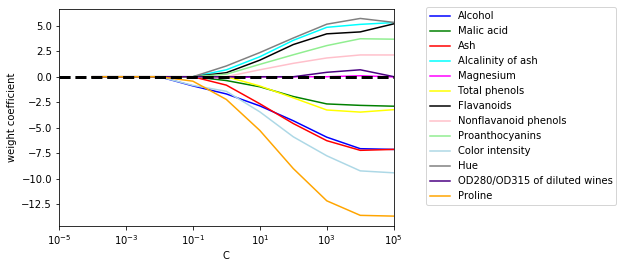

In [23]:
""" 규제 강도에 따른 특성의 가중치 변화도 """
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
         'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4, 6.) :
    lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto',
                           penalty = 'l1', C = 10.**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights) 

for column, color in zip(range(weights.shape[1]), colors) :
    plt.plot(params, weights[:, column], label = df_wine.columns[column + 1], color = color)

plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc = 'upper left')

ax.legend(loc = 'upper center', bbox_to_anchor = (1.38, 1.03),
          ncol = 1, fancybox = True)
plt.show()

# 강한 규제 파라미터 C < 0.1로 모델을 제약하면 모든 가중치가 0이 된다.